In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('supermarket_sales - Sheet1.csv')

In [ ]:
sales = df.copy()

In [ ]:
sales.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [ ]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [ ]:
sales.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,0.000000,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905,49.650000,10.00000


In [ ]:
sales.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [ ]:
sales.duplicated().sum()

0

In [ ]:
sales['Date'] = pd.to_datetime(sales['Date'])

In [ ]:
sales['day'] = sales['Date'].dt.day
sales['month'] = sales['Date'].dt.month_name()
sales['month']

0       January
1         March
2         March
3       January
4      February
         ...   
995     January
996       March
997    February
998    February
999    February
Name: month, Length: 1000, dtype: object

In [ ]:
sales['Date'].min()

Timestamp('2019-01-01 00:00:00')

In [ ]:
sales['Date'].max()

Timestamp('2019-03-30 00:00:00')

In [ ]:
sales['Date'].max() - sales['Date'].min()

Timedelta('88 days 00:00:00')

## EDA

In [ ]:
sales['City'].unique()


array(['Yangon', 'Naypyitaw', 'Mandalay'], dtype=object)

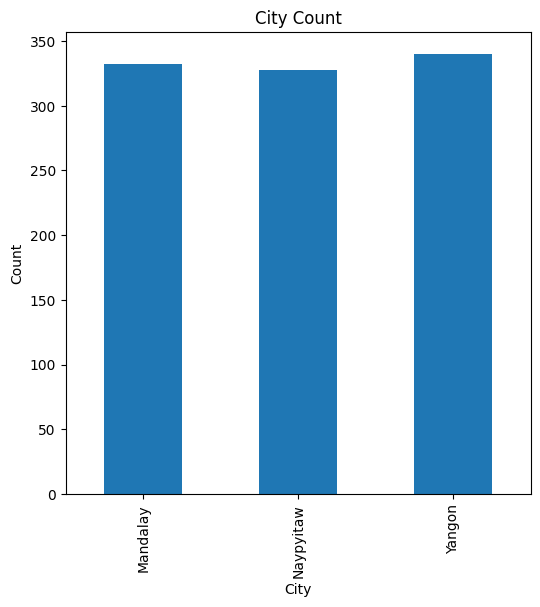

In [ ]:
city = sales['City'].value_counts().sort_index()

plt.figure(figsize=(6,6))
city.plot(kind='bar')
plt.title('City Count')
plt.ylabel('Count')
plt.xlabel('City')
plt.show()

In [ ]:
sales['Payment'].unique()

array(['Ewallet', 'Cash', 'Credit card'], dtype=object)

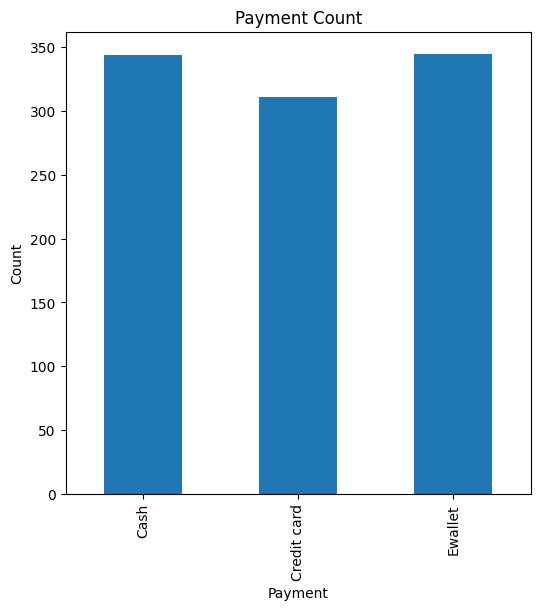

In [ ]:
payment = sales['Payment'].value_counts().sort_index()

plt.figure(figsize=(6,6))
payment.plot(kind='bar')
plt.title('Payment Count')
plt.ylabel('Count')
plt.xlabel('Payment')
plt.show()

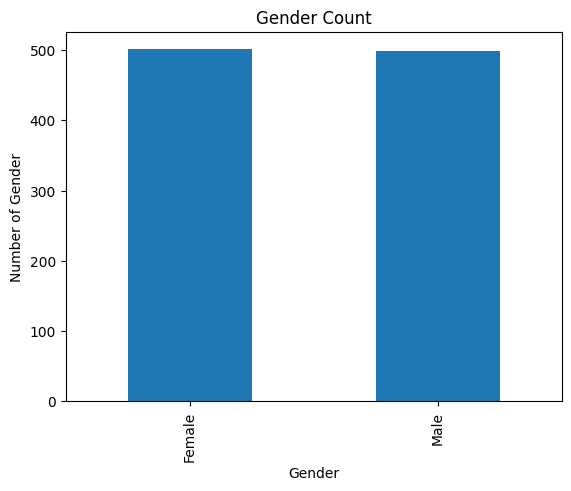

In [ ]:
gender = sales['Gender'].value_counts().sort_index()

gender.plot(kind='bar')
plt.title('Gender Count')
plt.ylabel('Number of Gender')
plt.xlabel('Gender')
plt.show()

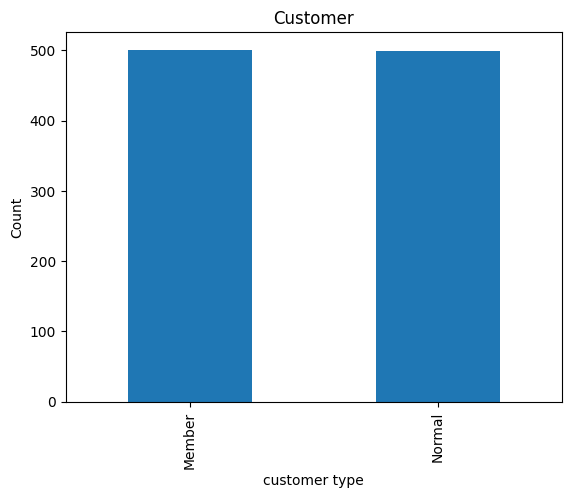

In [ ]:
customer = sales['Customer type'].value_counts().sort_index()

customer.plot(kind='bar')
plt.title('Customer')
plt.ylabel('Count')
plt.xlabel('customer type')
plt.show()

<Figure size 1200x600 with 0 Axes>

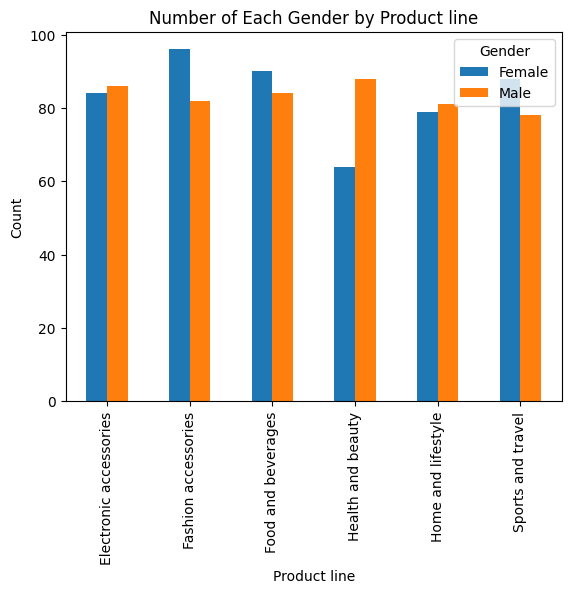

In [ ]:
# Membuat plot menggunakan Matplotlib
plt.figure(figsize=(12, 6))

# Menghitung jumlah tiap gender berdasarkan product line
product_gender = sales.groupby(['Product line', 'Gender']).size().unstack()

# Plot untuk tiap gender
product_gender.plot(kind='bar')

# Menambahkan judul dan label sumbu
plt.title('Number of Each Gender by Product line')
plt.xlabel('Product line')
plt.ylabel('Count')
plt.legend(title='Gender')

plt.show()

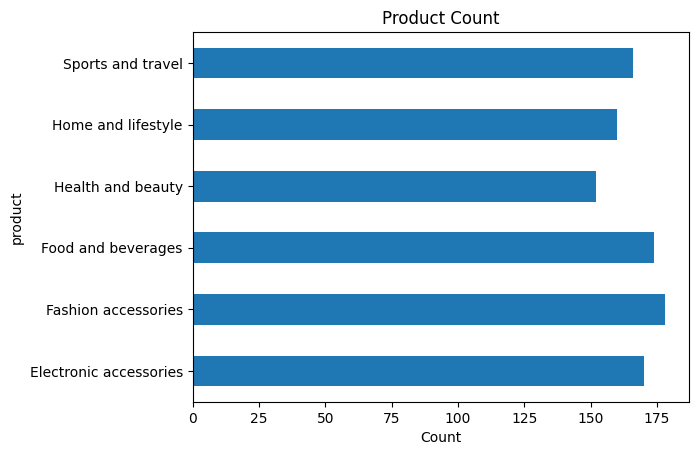

In [ ]:
product = sales['Product line'].value_counts().sort_index()

product.plot(kind='barh', y = product)
plt.title('Product Count')
plt.xlabel('Count')
plt.ylabel('product')
plt.show()

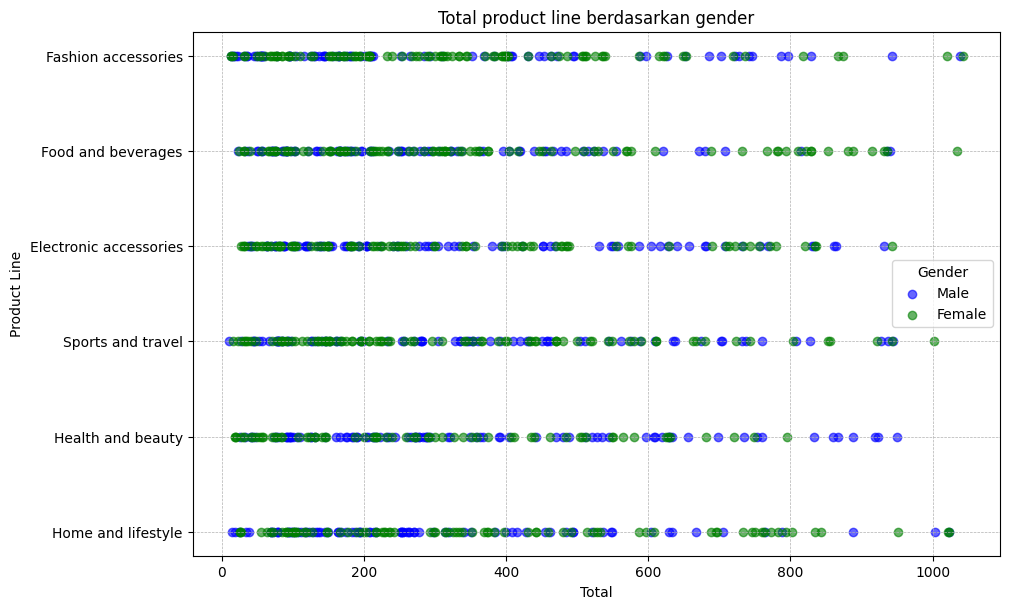

In [ ]:
#Filter data berdasarkan jenis kelamin
plt.figure(figsize=(10, 6))
male_sales = sales[sales['Gender'] == 'Male']
female_sales = sales[sales['Gender'] == 'Female']

# Plot strip plot untuk setiap jenis kelamin
plt.scatter(male_sales['Total'], male_sales['Product line'], color='blue', label='Male', alpha=0.6)
plt.scatter(female_sales['Total'], female_sales['Product line'], color='green', label='Female', alpha=0.6)

# Menambahkan legenda dan label sumbu
plt.title('Total product line berdasarkan gender')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.xlabel('Total')
plt.ylabel('Product Line')
plt.legend(title='Gender')

plt.show()

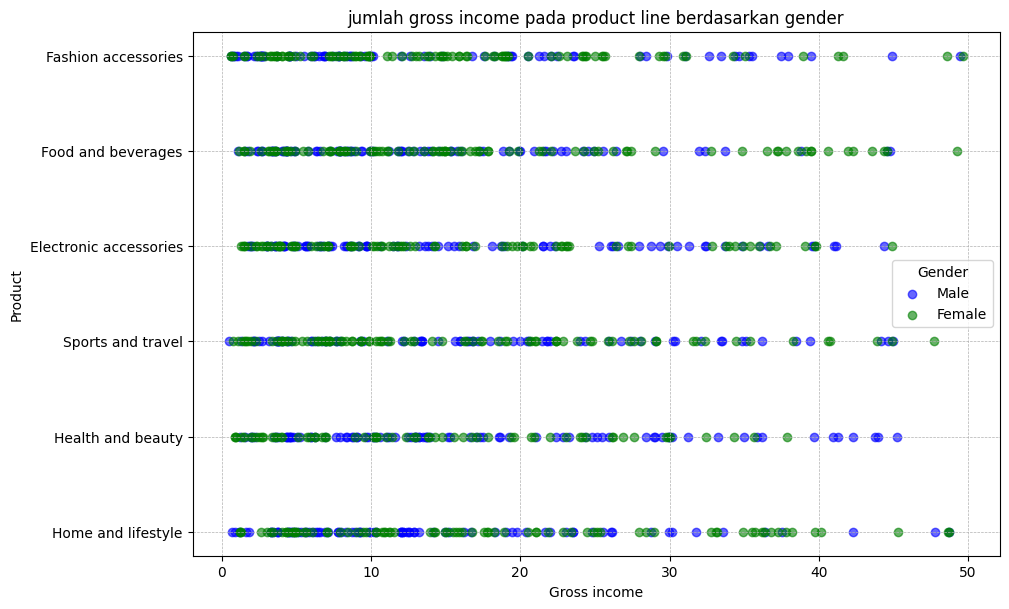

In [ ]:
#Filter data berdasarkan jenis kelamin
plt.figure(figsize=(10, 6))
male_sales = sales[sales['Gender'] == 'Male']
female_sales = sales[sales['Gender'] == 'Female']

# Plot strip plot untuk setiap jenis kelamin
plt.scatter(male_sales['gross income'], male_sales['Product line'], color='blue', label='Male', alpha=0.6)
plt.scatter(female_sales['gross income'], female_sales['Product line'], color='green', label='Female', alpha=0.6)

# Menambahkan legenda dan label sumbu
plt.title('jumlah gross income pada product line berdasarkan gender')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.xlabel('Gross income')
plt.ylabel('Product')
plt.legend(title='Gender')

plt.show()

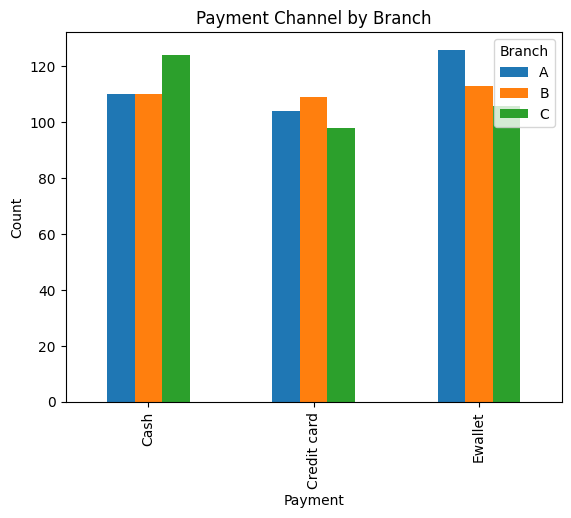

In [ ]:
grouped_data = sales.groupby(['Payment', 'Branch']).size().unstack()

grouped_data.plot(kind='bar')
plt.title('Payment Channel by Branch')
plt.xlabel('Payment')
plt.ylabel('Count')
plt.legend(title='Branch')
plt.show()

In [ ]:
sales.month.value_counts()

month
January     352
March       345
February    303
Name: count, dtype: int64

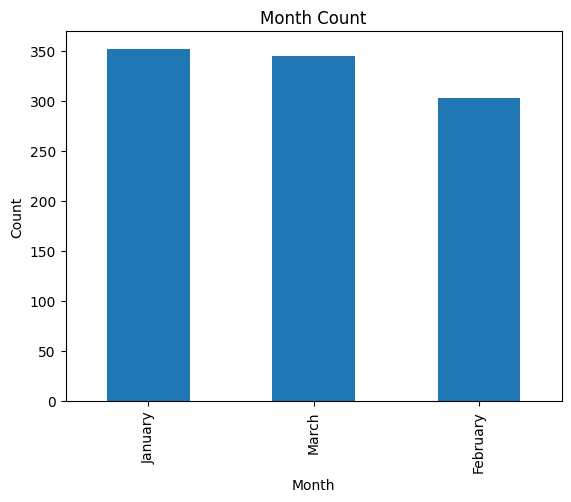

In [ ]:
month = sales['month'].value_counts()

month.plot(kind='bar')
plt.title('Month Count')
plt.ylabel('Count')
plt.xlabel('Month')
plt.show()

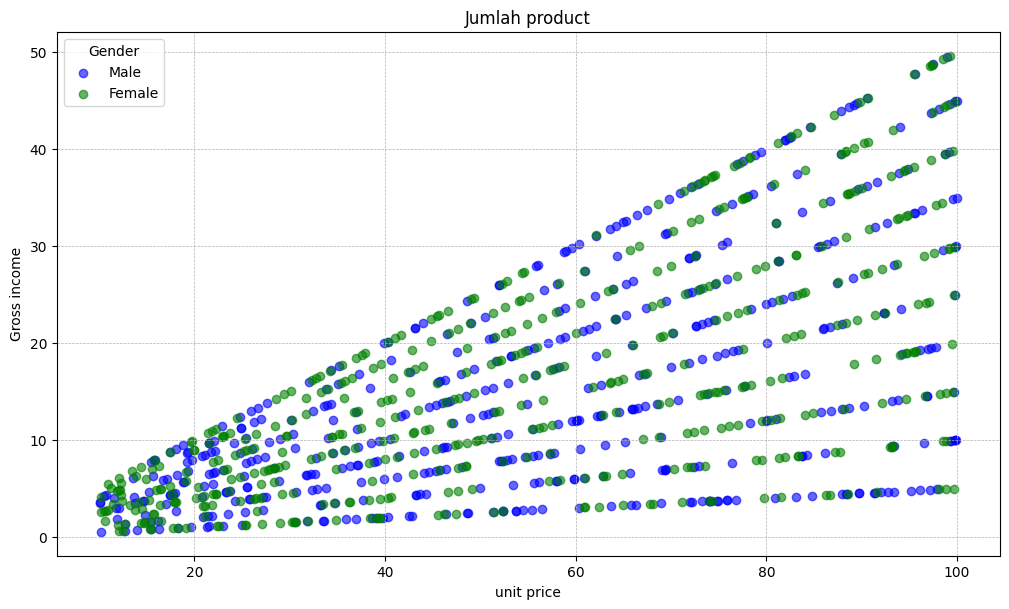

In [ ]:
#Filter data berdasarkan jenis kelamin
plt.figure(figsize=(10, 6))
male_sales = sales[sales['Gender'] == 'Male']
female_sales = sales[sales['Gender'] == 'Female']

# Plot strip plot untuk setiap jenis kelamin
plt.scatter(male_sales['Unit price'], male_sales['gross income'], color='blue', label='Male', alpha=0.6)
plt.scatter(female_sales['Unit price'], female_sales['gross income'], color='green', label='Female', alpha=0.6)

# Menambahkan legenda dan label sumbu
plt.title('Jumlah product')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.xlabel('unit price')
plt.ylabel('Gross income')
plt.legend(title='Gender')

plt.show()

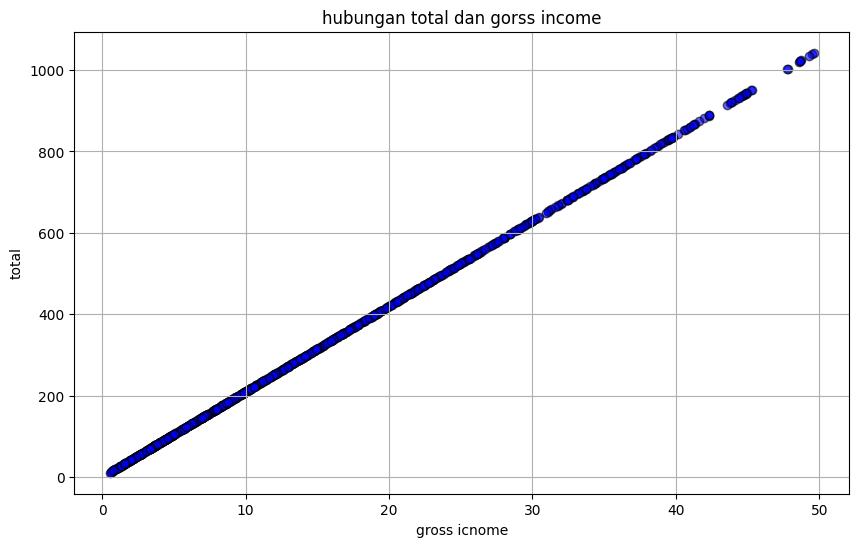

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(sales['gross income'], sales['Total'], color='b', edgecolors='black', alpha=0.6)
plt.title('hubungan total dan gorss income')
plt.xlabel('gross icnome')
plt.ylabel('total')
plt.grid(True)
plt.show()

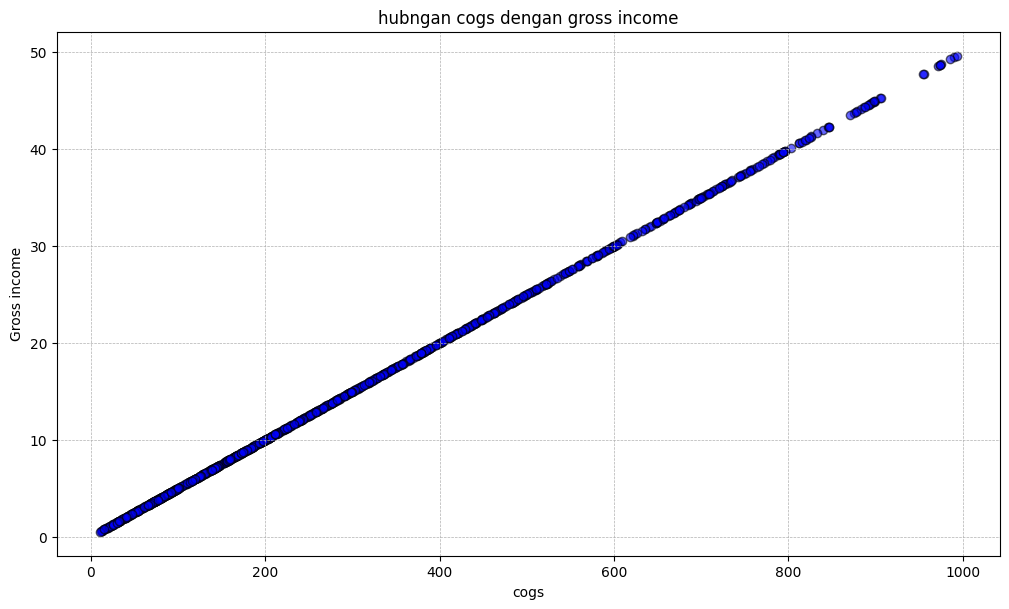

In [ ]:
#Filter data berdasarkan jenis kelamin
plt.figure(figsize=(10, 6))

# Plot strip plot untuk setiap jenis kelamin
plt.scatter(sales['cogs'], sales['gross income'], color='blue', alpha=0.6, edgecolors='black')

# Menambahkan legenda dan label sumbu
plt.title('hubngan cogs dengan gross income')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.xlabel('cogs')
plt.ylabel('Gross income')

plt.show()

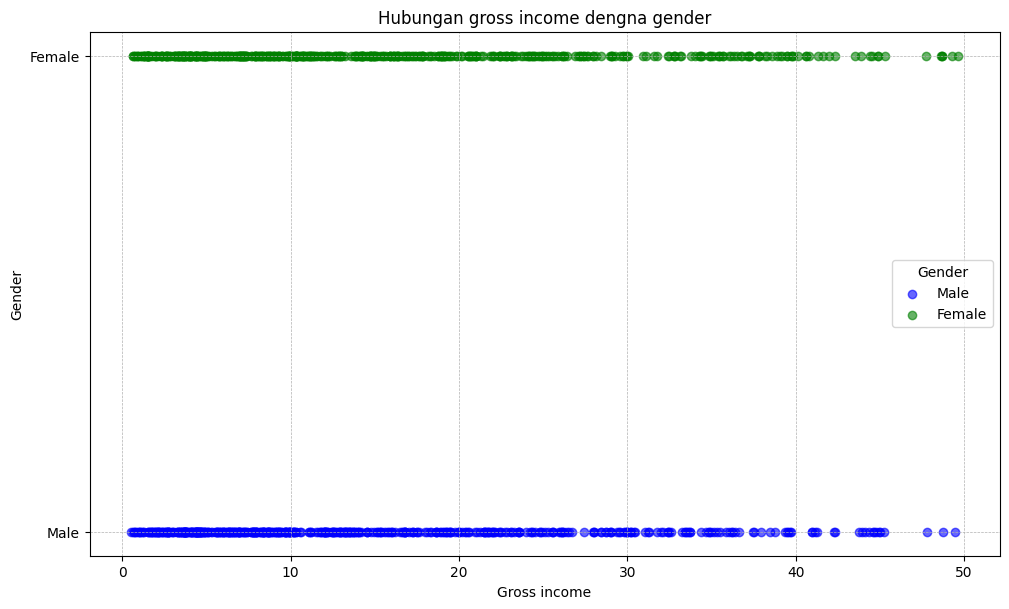

In [ ]:
#Filter data berdasarkan jenis kelamin
plt.figure(figsize=(10, 6))
male_sales = sales[sales['Gender'] == 'Male']
female_sales = sales[sales['Gender'] == 'Female']

# Plot strip plot untuk setiap jenis kelamin
plt.scatter(male_sales['gross income'],male_sales['Gender'], color='blue', label='Male', alpha=0.6)
plt.scatter(female_sales['gross income'],female_sales['Gender'], color='green', label='Female', alpha=0.6)

# Menambahkan legenda dan label sumbu
plt.title('Hubungan gross income dengna gender')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.xlabel('Gross income')
plt.ylabel('Gender')
plt.legend(title='Gender')

plt.show()

In [ ]:
sales.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,day,month
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08,Ewallet,522.83,4.761905,26.1415,9.1,5,January
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29,Cash,76.40,4.761905,3.8200,9.6,8,March
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23,Credit card,324.31,4.761905,16.2155,7.4,3,March
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33,Ewallet,465.76,4.761905,23.2880,8.4,27,January
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37,Ewallet,604.17,4.761905,30.2085,5.3,8,February
